* By looking at location and value of minimum saliniy along TWDP route to determine the whether or not have lower diffusivity case.

In [1]:
from __future__ import division, print_function
from salishsea_tools import (nc_tools,viz_tools,stormtools,tidetools)
from nowcast import figures
from datetime import datetime, timedelta
from nowcast import figures
import matplotlib.pyplot as plt
import scipy.io as sio
import netCDF4 as nc
import numpy as np
import math
import os
import datetime
%matplotlib inline

In [2]:
import sys
sys.path.append('/ocean/jieliu/research/meopar/analysis/jie/salinity_comparison/')
import salinity3

In [3]:
paths = {'nowcast': '/data/jieliu/MEOPAR/river-treatment/oct8_10nowcast/',
        'deepenresult': '/data/jieliu/MEOPAR/river-treatment/oct8_10RFdailySmoo/',
        'reduced_viscosity': '/data/jieliu/MEOPAR/river-treatment/oct8_10reduceviscosity/',
        'all_reduced': '/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/',
        'jetty': '/data/jieliu/MEOPAR/river-treatment/oct8_10jetty1e0605/',
        'WeakSlipJetty':'/data/jieliu/MEOPAR/parameters/oct8_10jettyshlat0.2/'}

In [4]:
def min_salinity_test(results_home):
    """This function was made to plot ferry 1.5m/average 3m salinity with different cases vs ferry salinity
        and there differences. should consider set up value_mean_4rd as {}"""
    days = [7,8,9];sal_min_obs = [np.nan]; lon_obs = [np.nan];sal_min_15 = [np.nan];lon_15=[np.nan];
    for day in days:
        for i in np.arange(24):
            if i < 12:
                saline = sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE192014100%s.mat' %(day))
            elif i>=12 and day!=9:
                saline = sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE192014100%s.mat' %(day+1))
            elif i>=12 and day ==9:
                saline = sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE19201410%s.mat' %(day+1))
            ## read in run_date, run_lower and run_upper for each trip case.
            run_date = datetime.datetime(2014,10,day+1)
            if i == 0 or i==14 or i==16 or i==21:
                run_lower = run_date.replace(hour = i, minute = 45)
                if i ==14:
                    run_upper = run_lower.replace(hour = i+2)
                if i==21:
                    run_upper = run_date.replace(day = day+2,hour = 0, minute = 45)
                else:
                    run_upper = run_lower.replace(hour = i +3, minute = 15)
            if i ==3 or i==5 or i==19:
                run_lower = run_date.replace(hour = i, minute = 15)
                run_upper = run_lower.replace(hour = i+2, minute = 45)
            ##extract values from ferry route   
            if i == 0 or i==14 or i==16 or i==21 or i ==3 or i==5 or i==19:
                lon_model, lat_model, lon1_model, lat1_model,\
                value_mean_3rd_deep, value_mean_4rd_deep, \
                value_mean_avedeep, value_mean_ave4deep,\
                salinity11, salinity1_2_4, date_str = salinity3.salinity_fxn_norm\
                (saline, run_date, results_home,run_lower,run_upper)
            ## find min salinity value and location along ferry route   
                salinity_min_obs, lon_min_obs, salinity_min_15,\
                lon_min_15, salinity_min_ave, lon_min_ave = salinity3.find_min_value_location\
                (run_date, results_home, saline, run_lower, run_upper,lon_model, lat_model, lon1_model, lat1_model,\
                value_mean_3rd_deep, value_mean_4rd_deep, \
                value_mean_avedeep, value_mean_ave4deep,\
                salinity11, salinity1_2_4, date_str)
            else: 
                salinity_min_obs= np.nan;lon_min_obs=np.nan;salinity_min_15=np.nan;lon_min_15=np.nan
            ## append the values to a list
            sal_min_obs.append(salinity_min_obs);
            lon_obs.append(lon_min_obs);
            sal_min_15.append(salinity_min_15);
            lon_15.append(lon_min_15);
    ##define t
    file = nc.Dataset(results_home+'SalishSea_1h_20141008_20141010_grid_T.nc')
    timesteps = file.variables['time_counter'][:]
    t_t = nc_tools.timestamp(file, np.arange(len(timesteps)))
    for ind in range(len(t_t)):
        t_t[ind] = t_t[ind].datetime
    tt = np.array(t_t)         
    return sal_min_obs, lon_obs, sal_min_15,lon_15,tt   

In [5]:
## reduce viscosity
sal_min_obs,lon_obs,sal_redu,lon_redu,tt = min_salinity_test(paths['reduced_viscosity'])

In [6]:
## reduce both
sal_min_obs,lon_obs,sal_allredu,lon_allredu,tt = min_salinity_test(paths['all_reduced'])

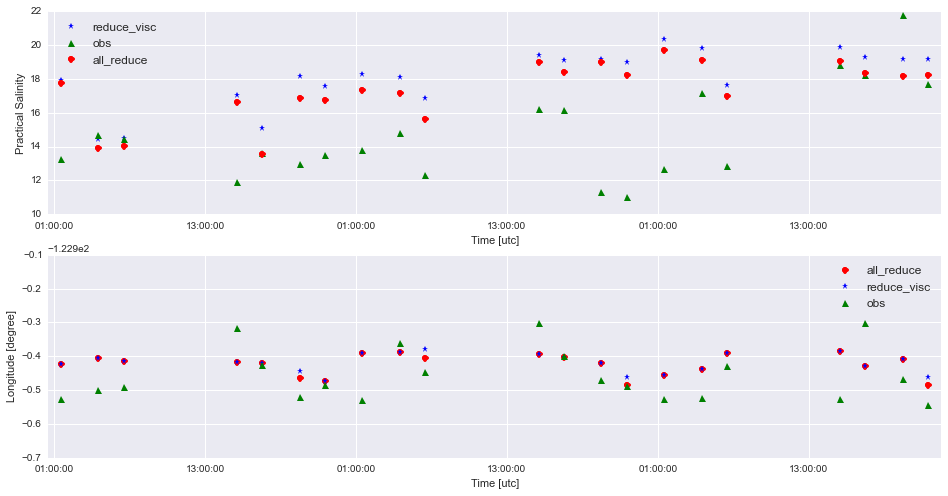

In [7]:
fig, axs = plt.subplots(2,1,figsize = [16,8])
axs[0].plot(tt,sal_redu[:-1],'b*',label = 'reduce_visc')
axs[0].plot(tt,sal_min_obs[:-1],'g^',label = 'obs')
axs[0].plot(tt,sal_allredu[:-1],'ro',label = 'all_reduce')
axs[0].set_ylabel('Practical Salinity')

axs[1].plot(tt,lon_allredu[:-1],'ro',label = 'all_reduce')
axs[1].plot(tt,lon_redu[:-1],'b*',label = 'reduce_visc')
axs[1].plot(tt,lon_obs[:-1],'g^',label = 'obs')
axs[1].set_ylabel('Longitude [degree]')
axs[1].set_ylim(-123.6, -123)
for ax in axs:
    ax.legend(loc = 'best', fontsize= 12)
    ax.set_xlabel('Time [utc]')
    ax.set_xlim(tt[0],tt[-1])

# Select neighbor hour to compare again

* For example, if the ferry departures at 3:15 am[utc], the modelled result select was 3:30 am[utc] rather than 4:30 am[utc] which shows above.

In [5]:
import importlib as imp
imp.reload(salinity3)

<module 'salinity3' from '/ocean/jieliu/research/meopar/salinity_comparison/salinity3.py'>

In [6]:
## reduce viscosity
sal_min_obs,lon_obs,sal_redu,lon_redu,tt = min_salinity_test(paths['reduced_viscosity'])

In [7]:
## reduce both
sal_min_obs,lon_obs,sal_allredu,lon_allredu,tt = min_salinity_test(paths['all_reduced'])

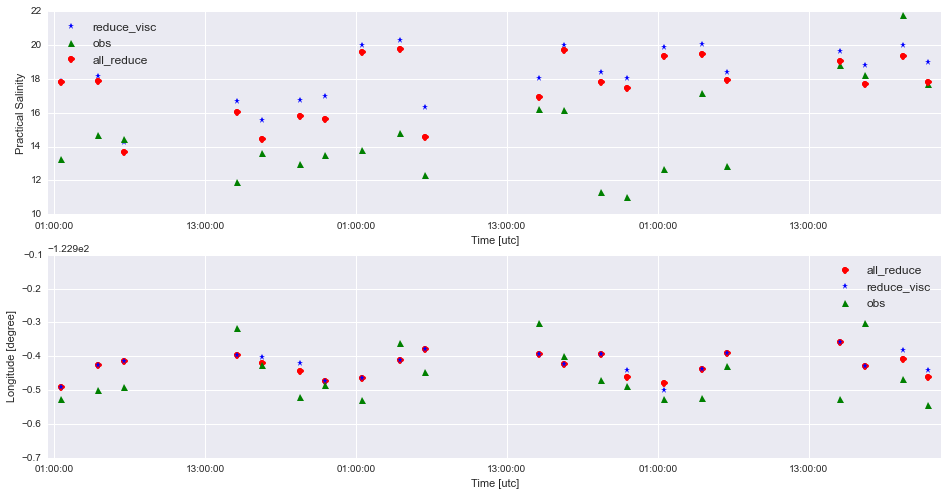

In [9]:
fig, axs = plt.subplots(2,1,figsize = [16,8])
axs[0].plot(tt,sal_redu[:-1],'b*',label = 'reduce_visc')
axs[0].plot(tt,sal_min_obs[:-1],'g^',label = 'obs')
axs[0].plot(tt,sal_allredu[:-1],'ro',label = 'all_reduce')
axs[0].set_ylabel('Practical Salinity')

axs[1].plot(tt,lon_allredu[:-1],'ro',label = 'all_reduce')
axs[1].plot(tt,lon_redu[:-1],'b*',label = 'reduce_visc')
axs[1].plot(tt,lon_obs[:-1],'g^',label = 'obs')
axs[1].set_ylabel('Longitude [degree]')
axs[1].set_ylim(-123.6, -123)
for ax in axs:
    ax.legend(loc = 'best', fontsize= 12)
    ax.set_xlabel('Time [utc]')
    ax.set_xlim(tt[0],tt[-1])

* Lower diffusivity did lower the minimum salinity value along ferry track, made 1.5 m layer fresher, which is closer to observational data.
* Not much influence on the location, which makes sense as the diffusivity should affect tracer transfer more than momentum transfer. Since the viscosity in the two runs are the same. Hence,not huge impact on the location.
* As the ferry track goes in a time period, say, from 3:15 am to 5:45 am [utc], during this period, which hourly result is best to represent the data? 3:30 am or 4:30 am? This is why there are two sets of plots in this notebook. It can be seen that no matter which hourly result to compare, the fact of lower diffusivity lower the 1.5m salinity value has not been changed. However, from the overall trend, the later hour appears to be more corresponds with data in these two sets of comparisons.